In [40]:
import pandas as pd
import numpy as np  


In [41]:
df = pd.read_csv("single_measures_df.csv")

In [42]:
df

,Unnamed: 0,date,company,slope,r_squared,std_error,stdev,up_percentage,down_percentage,end_day_target_percentage,end_day_target_value,buy_price,ticker,weekday
0,0,2024-10-23,Afarak Group SE,NaN,NaN,NaN,0.000000,0.000000,1.000000,-0.005068,0.294500,0.293500,AFAGR.HE,Wednesday
1,1,2024-10-23,Aktia Pankki Oyj,NaN,NaN,NaN,0.005047,0.016667,0.983333,-0.005314,9.360000,9.380000,AKTIA.HE,Wednesday
2,2,2024-10-23,Alma Media Oyj,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.008734,11.550000,11.500000,ALMA.HE,Wednesday
3,3,2024-10-23,Anora Group Oyj,NaN,NaN,NaN,0.005781,0.000000,1.000000,-0.004280,3.490000,3.490000,ANORA.HE,Wednesday
4,4,2024-10-23,Apetit Oyj,NaN,NaN,NaN,0.000000,0.000000,1.000000,-0.014760,13.350000,13.400000,APETIT.HE,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,2352,2024-11-19,WithSecure Oyj,0.000011,0.055604,0.000006,0.000813,0.033333,0.966667,-0.031332,0.742000,0.766000,WITH.HE,Tuesday
2353,2353,2024-11-19,Wulff-Yhtiöt Oyj,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.930000,2.930000,WUF1V.HE,Tuesday
2354,2354,2024-11-19,Wärtsilä Oyj Abp,-0.000432,0.107548,0.000163,0.022986,0.250000,0.750000,-0.001126,17.745001,17.775000,WRT1V.HE,Tuesday
2355,2355,2024-11-19,YIT Oyj,0.000088,0.105339,0.000034,0.004727,0.050000,0.950000,0.005600,2.514000,2.518000,YIT.HE,Tuesday


In [43]:
df = df.dropna()

In [44]:
df.reset_index(inplace=True)

In [45]:
df = df.drop(columns=['index','Unnamed: 0','date','company','end_day_target_value','buy_price','ticker'])

In [46]:
weekday_dummies = pd.get_dummies(data = df['weekday'])
weekday_dummies

,Friday,Monday,Thursday,Tuesday,Wednesday
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,False,True
...,...,...,...,...,...
1774,False,False,False,True,False
1775,False,False,False,True,False
1776,False,False,False,True,False
1777,False,False,False,True,False


In [47]:
df = pd.concat([df, weekday_dummies], axis = 1)

In [48]:
df.describe()


,slope,r_squared,std_error,stdev,up_percentage,down_percentage,end_day_target_percentage
count,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000
mean,0.000024,0.339631,0.000222,0.041174,0.111673,0.888327,-0.003112
std,0.003263,0.281770,0.000327,0.065684,0.133219,0.133219,0.020395
min,-0.055865,0.000000,0.000000,0.000000,0.000000,0.416667,-0.088050
25%,-0.000495,0.060558,0.000035,0.006051,0.016667,0.816667,-0.013577
50%,0.000000,0.307598,0.000114,0.020797,0.050000,0.950000,-0.002754
75%,0.000527,0.585704,0.000278,0.050408,0.183333,0.983333,0.006434
max,0.040220,0.951309,0.006123,1.270869,0.583333,1.000000,0.175657


In [49]:
df.sort_values(by = ['slope'], ascending = True).head(10)

,slope,r_squared,std_error,stdev,up_percentage,down_percentage,end_day_target_percentage,weekday,Friday,Monday,Thursday,Tuesday,Wednesday
760,-0.055865,0.589353,0.006123,1.270869,0.033333,0.966667,-0.015234,Tuesday,False,False,False,True,False
526,-0.031370,0.717738,0.002583,0.646665,0.416667,0.583333,-0.044828,Friday,True,False,False,False,False
453,-0.020711,0.563363,0.002394,0.481907,0.083333,0.916667,0.007901,Thursday,False,False,True,False,False
1237,-0.018597,0.800595,0.001219,0.362979,0.216667,0.783333,-0.021771,Tuesday,False,False,False,True,False
328,-0.014760,0.654252,0.001409,0.318679,0.116667,0.883333,-0.018944,Wednesday,False,False,False,False,True
1227,-0.014518,0.797360,0.000961,0.283946,0.283333,0.716667,-0.040688,Tuesday,False,False,False,True,False
402,-0.012649,0.735996,0.000995,0.257502,0.166667,0.833333,-0.010156,Thursday,False,False,True,False,False
1634,-0.012078,0.732314,0.000959,0.246496,0.100000,0.900000,-0.001464,Monday,False,True,False,False,False
826,-0.011657,0.747354,0.000890,0.235499,0.216667,0.783333,-0.016838,Wednesday,False,False,False,False,True
1265,-0.011337,0.627755,0.001146,0.249881,0.016667,0.983333,-0.038877,Tuesday,False,False,False,True,False


In [50]:
#Splitting data to y and x
y = df['end_day_target_percentage']
X = df.drop(columns=['end_day_target_percentage','weekday'])

In [51]:
df

,slope,r_squared,std_error,stdev,up_percentage,down_percentage,end_day_target_percentage,weekday,Friday,Monday,Thursday,Tuesday,Wednesday
0,0.013374,0.450395,0.001940,0.348035,0.416667,0.583333,0.018868,Wednesday,False,False,False,False,True
1,-0.000240,0.480133,0.000033,0.006051,0.000000,1.000000,-0.003650,Wednesday,False,False,False,False,True
2,-0.000324,0.596988,0.000035,0.007320,0.150000,0.850000,-0.000399,Wednesday,False,False,False,False,True
3,-0.000537,0.255226,0.000121,0.018576,0.333333,0.666667,0.002143,Wednesday,False,False,False,False,True
4,-0.000924,0.200149,0.000242,0.036055,0.116667,0.883333,-0.001165,Wednesday,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.019900,Tuesday,False,False,False,True,False
1775,0.000011,0.055604,0.000006,0.000813,0.033333,0.966667,-0.031332,Tuesday,False,False,False,True,False
1776,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,Tuesday,False,False,False,True,False
1777,-0.000432,0.107548,0.000163,0.022986,0.250000,0.750000,-0.001126,Tuesday,False,False,False,True,False


In [52]:
#Split the data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 69)

# Model building
## Linear regression

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

## Evaluate model performance

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [56]:
print(f"LR MSE (Train): {lr_train_mse}")
print(f"LR R2 (Train): {lr_train_r2}")
print(f"LR MSE (Test): {lr_test_mse}")
print(f"LR R2 (Test): {lr_test_r2}")

LR MSE (Train): 0.0003432947731980036
LR R2 (Train): 0.10257895528202055
LR MSE (Test): 0.0005214723426603457
LR R2 (Test): 0.045045412950534214


In [57]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns = ['method','training_mse','training_r2','testing_mse','testint_r2']

In [58]:
lr_results

,method,training_mse,training_r2,testing_mse,testint_r2
0,Linear Regression,0.000343,0.102579,0.000521,0.045045


## Random Forest

### Training the model

In [59]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 2, random_state = 100)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=100)

In [60]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### Evaluate model performance

In [61]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [62]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns = ['method','training_mse','training_r2','testing_mse','testint_r2']

##  Gradient Boosting Model

In [63]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
xgb_model.fit(X_train, y_train)
#y_pred_xgb = xgb_model.predict(X_test)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [64]:
y_xgb_train_pred = xgb_model.predict(X_train)
y_xgb_test_pred = xgb_model.predict(X_test)

In [66]:
xgb_train_mse = mean_squared_error(y_train, y_xgb_train_pred)
xgb_train_r2 = r2_score(y_train, y_rf_train_pred)

xgb_test_mse = mean_squared_error(y_test, y_xgb_test_pred)
xgb_test_r2 = r2_score(y_test, y_xgb_test_pred)

In [69]:
xgb_results = pd.DataFrame(['XGBoost',xgb_train_mse, xgb_train_r2, xgb_test_mse, xgb_test_r2]).transpose()
xgb_results.columns = ['method','training_mse','training_r2','testing_mse','testint_r2']

## Model comparison

In [70]:
df_models = pd.concat([lr_results, rf_results, xgb_results], axis = 0).reset_index(drop = True)
df_models

,method,training_mse,training_r2,testing_mse,testint_r2
0,Linear Regression,0.000343,0.102579,0.000521,0.045045
1,Random Forest,0.00033,0.136874,0.00049,0.102012
2,XGBoost,0.000043,0.136874,0.000587,-0.075017


## Data visualization

Text(0.5, 1.0, 'Linear Regression Model')

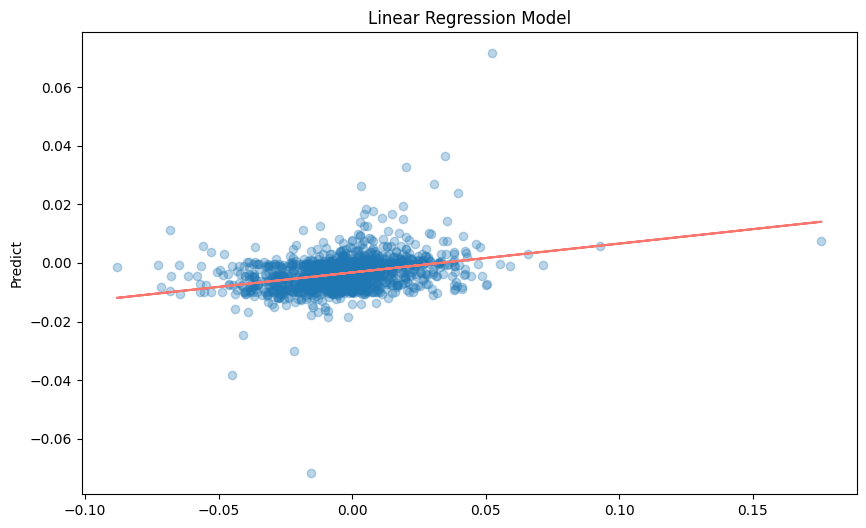

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize = (10,6))
plt.scatter(x=y_train, y = y_lr_train_pred, alpha = 0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict')
plt.title('Linear Regression Model')




Text(0.5, 1.0, 'Random Forest Regression Model')

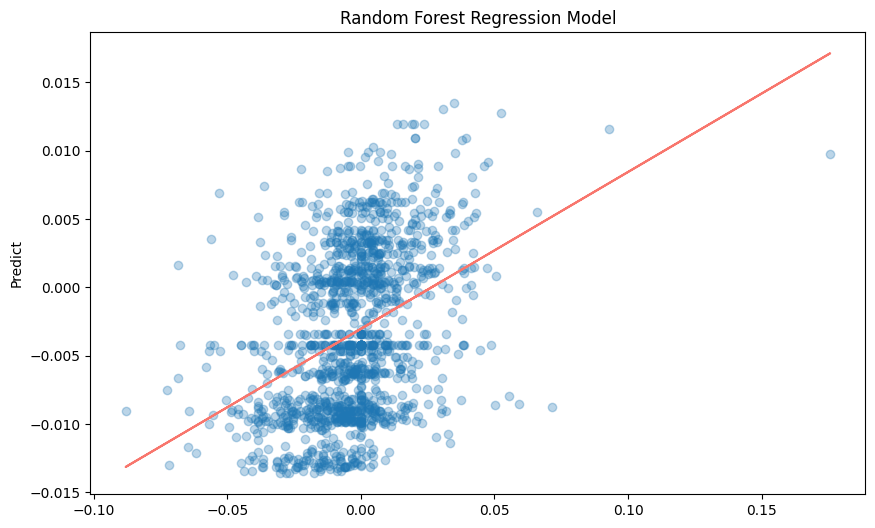

In [ ]:
plt.figure(figsize = (10,6))
plt.scatter(x=y_train, y = y_rf_train_pred, alpha = 0.3)

z = np.polyfit(y_train, y_rf_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict')
plt.title('Random Forest Regression Model')

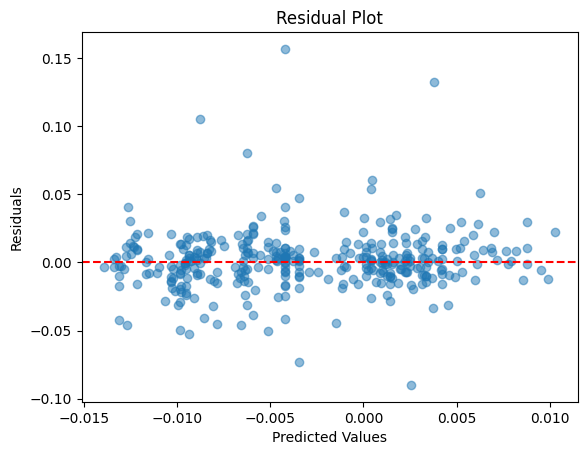

In [ ]:
residuals = y_test - y_rf_test_pred
plt.scatter(y_rf_test_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

[]

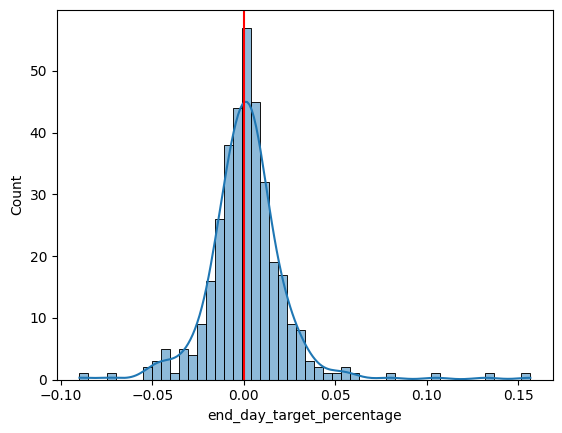

In [ ]:
import seaborn as sns
sns.histplot(x = residuals, bins = 50, kde = True)
plt.axvline(x = 0, color='red')
plt.plot()

## Feature importance of Random Forest model

In [ ]:
feature_importance = rf.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'feature':feature_names,
    'importance':feature_importance
}).sort_values(by='importance',ascending=False)

In [ ]:
importance_df

,feature,importance
0,slope,0.680473
1,r_squared,0.209752
8,Thursday,0.093069
10,Wednesday,0.007887
2,std_error,0.005958
3,stdev,0.001586
9,Tuesday,0.001276
6,Friday,0.000000
5,down_percentage,0.000000
4,up_percentage,0.000000


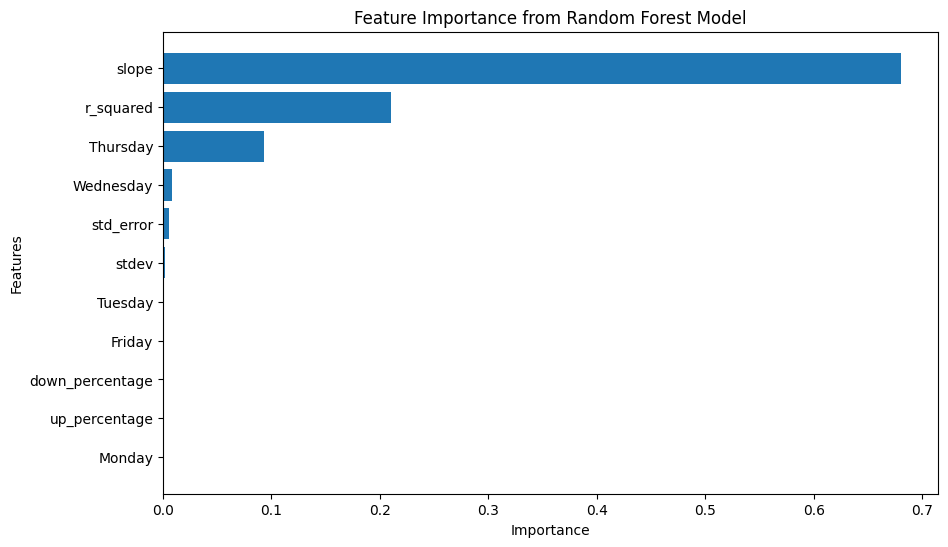

In [ ]:
plt.figure(figsize = (10,6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

### Saving models to pickle

In [72]:
import pickle

with open('regression_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)